In [282]:
import pandas as pd
import numpy as np

In [283]:
import math
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import seed
seed(1)
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import tensorflow
tensorflow.random.set_seed(1)
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [284]:
df = pd.read_csv(r"C:\Users\Avenger\Desktop\ML Assignment 3\Mouse-annotation\labeled-data\0026\A20490554_CollectedData_annotation.csv")
df

,scorer,Unnamed: 1,Unnamed: 2,annotation,annotation.1,annotation.2,annotation.3,annotation.4,annotation.5,annotation.6,...,annotation.26,annotation.27,annotation.28,annotation.29,annotation.30,annotation.31,annotation.32,annotation.33,annotation.34,annotation.35
0,individuals,NaN,NaN,mouse1,mouse1,mouse1,mouse1,mouse1,mouse1,mouse1,...,mouse2,mouse2,mouse2,mouse2,mouse2,mouse2,mouse2,mouse2,mouse2,mouse2
1,bodyparts,NaN,NaN,topleft,topleft,rightdown,rightdown,nose,nose,leftear,...,rightear,rightear,leftHip,leftHip,rightHip,rightHip,tailBase,tailBase,tailEnd,tailEnd
2,coords,NaN,NaN,x,y,x,y,x,y,x,...,x,y,x,y,x,y,x,y,x,y
3,labeled-data,26.0,A_male_in_a_new_cage_face_view_3_2022-08-10_15...,288.90725510353957,195.66725762121555,519.4544117121457,319.195054047468,513.9875060319326,264.3998174684766,498.12614606718023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,labeled-data,26.0,A_male_in_a_new_cage_face_view_3_2022-08-10_15...,106.38314722660519,107.25094064813686,365.8199720839907,326.81642189586114,121.13008253428816,110.52803738317755,174.10981308411218,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,labeled-data,26.0,A_male_meet_with_the_same_cage_mate_top_view_1...,352.976489028213,188.80586654724584,473.89005821764454,320.4673085535155,387.90707568293783,196.8667711598746,371.78526645768034,...,470.307433945365,106.40550828481861,416.5680698611733,145.8143752798925,430.89856695029107,156.56224809673083,407.61150918047474,178.0579937304075,309.08934169278996,240.7539184952978
125,labeled-data,26.0,A_male_meet_with_the_same_cage_mate_top_view_1...,268.7848186296462,124.31862964621581,415.6724137931035,293.59762651141966,397.7592924317063,152.97962382445138,387.0114196148679,...,226.68898343036278,186.11889834303625,284.9066278549037,236.2756381549485,287.59359605911334,214.77989252127182,311.7763098969996,240.7539184952978,427.31594267801165,271.2062248096731
126,labeled-data,26.0,A_male_meet_with_the_same_cage_mate_top_view_1...,270.57613076578593,165.5188087774294,415.6724137931034,325.84124496193465,377.15920286609946,318.6759964173758,398.6549484997761,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,labeled-data,26.0,A_male_meet_with_the_same_cage_mate_top_view_1...,367.306986117331,140.44043887147336,611.8210927004031,270.3105687416032,580.473130317958,150.29265562024182,539.2729511867443,...,83.38401253918494,74.16188983430362,139.81034482758616,169.1014330497089,149.66256157635473,150.29265562024182,160.410434393193,170.8927451858486,235.64554411106133,214.77989252127182


# Data Cleaning

In [285]:
df = df.drop(columns=['scorer', 'Unnamed: 1', 'Unnamed: 2'])
df.rename(columns={'annotation': 'mouse1 topleft x', 'annotation.1': 'mouse1 topleft y',
                   'annotation.2': 'mouse1 rightdown x', 'annotation.3': 'mouse1 rightdown y',
                   'annotation.4': 'mouse1 nose x', 'annotation.5': 'mouse1 nose y',
                   'annotation.6': 'mouse1 leftear x', 'annotation.7': 'mouse1 leftear y',
                   'annotation.8': 'mouse1 rightear x', 'annotation.9': 'mouse1 rightear y',
                   'annotation.10': 'mouse1 leftHip x', 'annotation.11': 'mouse1 leftHip y',
                   'annotation.12': 'mouse1 rightHip x', 'annotation.13': 'mouse1 rightHip y',
                   'annotation.14': 'mouse1 tailBase x', 'annotation.15': 'mouse1 tailBase y',
                   'annotation.16': 'mouse1 tailEnd x', 'annotation.17': 'mouse1 tailEnd y',
                   'annotation.18': 'mouse2 topleft x', 'annotation.19': 'mouse2 topleft y',
                   'annotation.20': 'mouse2 rightdown x', 'annotation.21': 'mouse2 rightdown y',
                   'annotation.22': 'mouse2 nose x', 'annotation.23': 'mouse2 nose y',
                   'annotation.24': 'mouse2 leftear x', 'annotation.25': 'mouse2 leftear y',
                   'annotation.26': 'mouse2 rightear x', 'annotation.27': 'mouse2 rightear y',
                   'annotation.28': 'mouse2 leftHip x', 'annotation.29': 'mouse2 leftHip y',
                   'annotation.30': 'mouse2 rightHip x', 'annotation.31': 'mouse2 rightHip y',
                   'annotation.32': 'mouse2 tailBase x', 'annotation.33': 'mouse2 tailBase y',
                   'annotation.34': 'mouse2 tailEnd x', 'annotation.35': 'mouse2 tailEnd y'}, inplace=True)

df

,mouse1 topleft x,mouse1 topleft y,mouse1 rightdown x,mouse1 rightdown y,mouse1 nose x,mouse1 nose y,mouse1 leftear x,mouse1 leftear y,mouse1 rightear x,mouse1 rightear y,...,mouse2 rightear x,mouse2 rightear y,mouse2 leftHip x,mouse2 leftHip y,mouse2 rightHip x,mouse2 rightHip y,mouse2 tailBase x,mouse2 tailBase y,mouse2 tailEnd x,mouse2 tailEnd y
0,mouse1,mouse1,mouse1,mouse1,mouse1,mouse1,mouse1,mouse1,mouse1,mouse1,...,mouse2,mouse2,mouse2,mouse2,mouse2,mouse2,mouse2,mouse2,mouse2,mouse2
1,topleft,topleft,rightdown,rightdown,nose,nose,leftear,leftear,rightear,rightear,...,rightear,rightear,leftHip,leftHip,rightHip,rightHip,tailBase,tailBase,tailEnd,tailEnd
2,x,y,x,y,x,y,x,y,x,y,...,x,y,x,y,x,y,x,y,x,y
3,288.90725510353957,195.66725762121555,519.4544117121457,319.195054047468,513.9875060319326,264.3998174684766,498.12614606718023,198.6884690430732,475.46706040324807,203.97558903132406,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,106.38314722660519,107.25094064813686,365.8199720839907,326.81642189586114,121.13008253428816,110.52803738317755,174.10981308411218,142.20663915523727,173.56363029493875,133.46771452846218,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,352.976489028213,188.80586654724584,473.89005821764454,320.4673085535155,387.90707568293783,196.8667711598746,371.78526645768034,211.19726824899234,398.6549484997761,213.88423645320194,...,470.307433945365,106.40550828481861,416.5680698611733,145.8143752798925,430.89856695029107,156.56224809673083,407.61150918047474,178.0579937304075,309.08934169278996,240.7539184952978
125,268.7848186296462,124.31862964621581,415.6724137931035,293.59762651141966,397.7592924317063,152.97962382445138,387.0114196148679,136.8578145991939,405.82019704433503,155.66659202866097,...,226.68898343036278,186.11889834303625,284.9066278549037,236.2756381549485,287.59359605911334,214.77989252127182,311.7763098969996,240.7539184952978,427.31594267801165,271.2062248096731
126,270.57613076578593,165.5188087774294,415.6724137931034,325.84124496193465,377.15920286609946,318.6759964173758,398.6549484997761,302.5541871921182,372.68092252575013,299.8672189879087,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,367.306986117331,140.44043887147336,611.8210927004031,270.3105687416032,580.473130317958,150.29265562024182,539.2729511867443,161.93618450515,565.2469771607703,192.3884908195253,...,83.38401253918494,74.16188983430362,139.81034482758616,169.1014330497089,149.66256157635473,150.29265562024182,160.410434393193,170.8927451858486,235.64554411106133,214.77989252127182


In [286]:
df = df.drop(range(0,3))
df = df.reset_index(drop=True)
df

,mouse1 topleft x,mouse1 topleft y,mouse1 rightdown x,mouse1 rightdown y,mouse1 nose x,mouse1 nose y,mouse1 leftear x,mouse1 leftear y,mouse1 rightear x,mouse1 rightear y,...,mouse2 rightear x,mouse2 rightear y,mouse2 leftHip x,mouse2 leftHip y,mouse2 rightHip x,mouse2 rightHip y,mouse2 tailBase x,mouse2 tailBase y,mouse2 tailEnd x,mouse2 tailEnd y
0,288.90725510353957,195.66725762121555,519.4544117121457,319.195054047468,513.9875060319326,264.3998174684766,498.12614606718023,198.6884690430732,475.46706040324807,203.97558903132406,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,106.38314722660519,107.25094064813686,365.8199720839907,326.81642189586114,121.13008253428816,110.52803738317755,174.10981308411218,142.20663915523727,173.56363029493875,133.46771452846218,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,77.64262285364255,139.8935742654469,270.4431128850599,268.4272342863918,85.60958525163501,164.8567231124899,129.69344385385995,145.2048825307752,121.19535062933464,143.08035922464387,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,76.58036120057692,134.58226600011858,268.3185895789286,266.3027109802605,81.36053863937236,159.0142840206288,128.10005137426145,142.54922839811104,121.19535062933464,140.95583591851255,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,139.54736213341556,208.37741338779918,369.1515858029212,284.68093182781615,167.29409611160355,241.67349416162475,159.66374426760188,227.80012717253075,179.08645805233346,227.80012717253075,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,352.976489028213,188.80586654724584,473.89005821764454,320.4673085535155,387.90707568293783,196.8667711598746,371.78526645768034,211.19726824899234,398.6549484997761,213.88423645320194,...,470.307433945365,106.40550828481861,416.5680698611733,145.8143752798925,430.89856695029107,156.56224809673083,407.61150918047474,178.0579937304075,309.08934169278996,240.7539184952978
122,268.7848186296462,124.31862964621581,415.6724137931035,293.59762651141966,397.7592924317063,152.97962382445138,387.0114196148679,136.8578145991939,405.82019704433503,155.66659202866097,...,226.68898343036278,186.11889834303625,284.9066278549037,236.2756381549485,287.59359605911334,214.77989252127182,311.7763098969996,240.7539184952978,427.31594267801165,271.2062248096731
123,270.57613076578593,165.5188087774294,415.6724137931034,325.84124496193465,377.15920286609946,318.6759964173758,398.6549484997761,302.5541871921182,372.68092252575013,299.8672189879087,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,367.306986117331,140.44043887147336,611.8210927004031,270.3105687416032,580.473130317958,150.29265562024182,539.2729511867443,161.93618450515,565.2469771607703,192.3884908195253,...,83.38401253918494,74.16188983430362,139.81034482758616,169.1014330497089,149.66256157635473,150.29265562024182,160.410434393193,170.8927451858486,235.64554411106133,214.77989252127182


In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   mouse1 topleft x    125 non-null    object
 1   mouse1 topleft y    125 non-null    object
 2   mouse1 rightdown x  126 non-null    object
 3   mouse1 rightdown y  126 non-null    object
 4   mouse1 nose x       126 non-null    object
 5   mouse1 nose y       126 non-null    object
 6   mouse1 leftear x    126 non-null    object
 7   mouse1 leftear y    126 non-null    object
 8   mouse1 rightear x   126 non-null    object
 9   mouse1 rightear y   126 non-null    object
 10  mouse1 leftHip x    126 non-null    object
 11  mouse1 leftHip y    126 non-null    object
 12  mouse1 rightHip x   126 non-null    object
 13  mouse1 rightHip y   126 non-null    object
 14  mouse1 tailBase x   126 non-null    object
 15  mouse1 tailBase y   126 non-null    object
 16  mouse1 tailEnd x    126 no

In [288]:
# converting data types to float
df = df.apply(pd.to_numeric)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   mouse1 topleft x    125 non-null    float64
 1   mouse1 topleft y    125 non-null    float64
 2   mouse1 rightdown x  126 non-null    float64
 3   mouse1 rightdown y  126 non-null    float64
 4   mouse1 nose x       126 non-null    float64
 5   mouse1 nose y       126 non-null    float64
 6   mouse1 leftear x    126 non-null    float64
 7   mouse1 leftear y    126 non-null    float64
 8   mouse1 rightear x   126 non-null    float64
 9   mouse1 rightear y   126 non-null    float64
 10  mouse1 leftHip x    126 non-null    float64
 11  mouse1 leftHip y    126 non-null    float64
 12  mouse1 rightHip x   126 non-null    float64
 13  mouse1 rightHip y   126 non-null    float64
 14  mouse1 tailBase x   126 non-null    float64
 15  mouse1 tailBase y   126 non-null    float64
 16  mouse1 t

In [289]:
df

,mouse1 topleft x,mouse1 topleft y,mouse1 rightdown x,mouse1 rightdown y,mouse1 nose x,mouse1 nose y,mouse1 leftear x,mouse1 leftear y,mouse1 rightear x,mouse1 rightear y,...,mouse2 rightear x,mouse2 rightear y,mouse2 leftHip x,mouse2 leftHip y,mouse2 rightHip x,mouse2 rightHip y,mouse2 tailBase x,mouse2 tailBase y,mouse2 tailEnd x,mouse2 tailEnd y
0,288.907255,195.667258,519.454412,319.195054,513.987506,264.399817,498.126146,198.688469,475.467060,203.975589,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,106.383147,107.250941,365.819972,326.816422,121.130083,110.528037,174.109813,142.206639,173.563630,133.467715,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,77.642623,139.893574,270.443113,268.427234,85.609585,164.856723,129.693444,145.204883,121.195351,143.080359,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,76.580361,134.582266,268.318590,266.302711,81.360539,159.014284,128.100051,142.549228,121.195351,140.955836,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,139.547362,208.377413,369.151586,284.680932,167.294096,241.673494,159.663744,227.800127,179.086458,227.800127,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,352.976489,188.805867,473.890058,320.467309,387.907076,196.866771,371.785266,211.197268,398.654948,213.884236,...,470.307434,106.405508,416.568070,145.814375,430.898567,156.562248,407.611509,178.057994,309.089342,240.753918
122,268.784819,124.318630,415.672414,293.597627,397.759292,152.979624,387.011420,136.857815,405.820197,155.666592,...,226.688983,186.118898,284.906628,236.275638,287.593596,214.779893,311.776310,240.753918,427.315943,271.206225
123,270.576131,165.518809,415.672414,325.841245,377.159203,318.675996,398.654948,302.554187,372.680923,299.867219,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,367.306986,140.440439,611.821093,270.310569,580.473130,150.292656,539.272951,161.936185,565.246977,192.388491,...,83.384013,74.161890,139.810345,169.101433,149.662562,150.292656,160.410434,170.892745,235.645544,214.779893


# Ground Truth

In [290]:
df['mouse1 center x'] = (df['mouse1 topleft x'] + df['mouse1 rightdown x'])/2
df['mouse1 center y'] = (df['mouse1 topleft y'] + df['mouse1 rightdown y'])/2
df['mouse2 center x'] = (df['mouse2 topleft x'] + df['mouse2 rightdown x'])/2
df['mouse2 center y'] = (df['mouse2 topleft y'] + df['mouse2 rightdown y'])/2

In [304]:
df

,mouse1 topleft x,mouse1 topleft y,mouse1 rightdown x,mouse1 rightdown y,mouse1 nose x,mouse1 nose y,mouse1 leftear x,mouse1 leftear y,mouse1 rightear x,mouse1 rightear y,...,mouse2 rightHip x,mouse2 rightHip y,mouse2 tailBase x,mouse2 tailBase y,mouse2 tailEnd x,mouse2 tailEnd y,mouse1 center x,mouse1 center y,mouse2 center x,mouse2 center y
0,288.907255,195.667258,519.454412,319.195054,513.987506,264.399817,498.126146,198.688469,475.467060,203.975589,...,NaN,NaN,NaN,NaN,NaN,NaN,404.180833,257.431156,NaN,NaN
1,106.383147,107.250941,365.819972,326.816422,121.130083,110.528037,174.109813,142.206639,173.563630,133.467715,...,NaN,NaN,NaN,NaN,NaN,NaN,236.101560,217.033681,NaN,NaN
2,77.642623,139.893574,270.443113,268.427234,85.609585,164.856723,129.693444,145.204883,121.195351,143.080359,...,NaN,NaN,NaN,NaN,NaN,NaN,174.042868,204.160404,NaN,NaN
3,76.580361,134.582266,268.318590,266.302711,81.360539,159.014284,128.100051,142.549228,121.195351,140.955836,...,NaN,NaN,NaN,NaN,NaN,NaN,172.449475,200.442488,NaN,NaN
4,139.547362,208.377413,369.151586,284.680932,167.294096,241.673494,159.663744,227.800127,179.086458,227.800127,...,NaN,NaN,NaN,NaN,NaN,NaN,254.349474,246.529173,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,352.976489,188.805867,473.890058,320.467309,387.907076,196.866771,371.785266,211.197268,398.654948,213.884236,...,430.898567,156.562248,407.611509,178.057994,309.089342,240.753918,413.433274,254.636588,391.041872,156.114420
122,268.784819,124.318630,415.672414,293.597627,397.759292,152.979624,387.011420,136.857815,405.820197,155.666592,...,287.593596,214.779893,311.776310,240.753918,427.315943,271.206225,342.228616,208.958128,315.806762,227.766906
123,270.576131,165.518809,415.672414,325.841245,377.159203,318.675996,398.654948,302.554187,372.680923,299.867219,...,NaN,NaN,NaN,NaN,NaN,NaN,343.124272,245.680027,NaN,NaN
124,367.306986,140.440439,611.821093,270.310569,580.473130,150.292656,539.272951,161.936185,565.246977,192.388491,...,149.662562,150.292656,160.410434,170.892745,235.645544,214.779893,489.564039,205.375504,146.975593,142.231751


In [291]:
y1 = np.array(df["mouse1 center x"])

In [292]:
y1

array([404.18083341, 236.10155966, 174.04286787, 172.44947539,
       254.34947397, 185.3294732 , 492.19001264, 494.54075235,
       461.11894548, 151.55663846, 512.92504664, 510.70243149,
       503.80158326, 435.9052348 , 228.16590707, 244.47279651,
       180.35737255, 177.22257632, 179.87649448, 235.00065522,
       444.74612034, 506.35635131, 224.55023275, 249.25017971,
        97.13241581,  89.23676139, 263.46665416, 257.42841196,
       278.37883195, 372.0062886 , 294.53699621, 320.41517707,
       321.70908612, 272.83928167, 246.26770273, 360.74705372,
       343.69888141, 310.59621765, 335.84979619, 303.90919667,
       281.44631753, 271.9281484 , 218.24567452, 323.32626169,
       324.84916875, 346.55059436, 240.70855366, 239.1856466 ,
       271.14885902, 397.84819235, 197.35679186, 458.92225342,
       277.12372297, 285.47780996, 301.45463889, 518.40315799,
       356.11221153, 248.05839484, 248.47883771, 228.71802298,
       254.07213184, 259.13566037, 271.37252098, 263.35

In [293]:
x1 = np.column_stack((df['mouse1 nose x'],df['mouse1 nose y'],
                      df['mouse1 leftear x'],df['mouse1 leftear y'],
                      df['mouse1 rightear x'],df['mouse1 rightear y'],
                      df['mouse1 leftHip x'],df['mouse1 leftHip y'],
                      df['mouse1 rightHip x'],df['mouse1 rightHip y'],
                      df['mouse1 tailBase x'],df['mouse1 tailBase y'],
                      df['mouse1 tailEnd x'],df['mouse1 tailEnd y']))

In [294]:
x1

array([[513.98750603, 264.39981747, 498.12614607, ..., 258.35739462,
        296.46028366, 292.34602312],
       [121.13008253, 110.52803738, 174.10981308, ..., 289.67599223,
        360.35814419, 297.32255128],
       [ 85.60958525, 164.85672311, 129.69344385, ..., 234.43486139,
        264.06954297, 257.80461776],
       ...,
       [377.15920287, 318.67599642, 398.6549485 , ..., 221.049485  ,
        279.53269145, 170.89274519],
       [580.47313032, 150.29265562, 539.27295119, ..., 234.48432602,
        376.2635468 , 255.98007165],
       [571.51656964, 272.10188088, 547.3338558 , ..., 224.63210927,
        352.08083296, 180.74496193]])

In [295]:
x1 = sm.add_constant(x1, prepend=True)

In [296]:
x1

array([[  1.        , 513.98750603, 264.39981747, ..., 258.35739462,
        296.46028366, 292.34602312],
       [  1.        , 121.13008253, 110.52803738, ..., 289.67599223,
        360.35814419, 297.32255128],
       [  1.        ,  85.60958525, 164.85672311, ..., 234.43486139,
        264.06954297, 257.80461776],
       ...,
       [  1.        , 377.15920287, 318.67599642, ..., 221.049485  ,
        279.53269145, 170.89274519],
       [  1.        , 580.47313032, 150.29265562, ..., 234.48432602,
        376.2635468 , 255.98007165],
       [  1.        , 571.51656964, 272.10188088, ..., 224.63210927,
        352.08083296, 180.74496193]])

In [297]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.3)

In [298]:
X_train

array([[  1.        , 631.92273194, 229.29725311, ..., 288.15925441,
        407.40624124, 273.02331122],
       [  1.        , 210.18821792,  59.01333865, ..., 168.72312345,
        238.03762483, 119.775681  ],
       [  1.        , 240.74908845, 216.24628211, ..., 250.95931193,
        330.71590397, 296.62646974],
       ...,
       [  1.        , 404.08796185, 269.46118273, ..., 318.62972636,
        604.2125605 , 278.08724302],
       [  1.        , 122.08858207, 240.19145871, ..., 306.41192766,
        308.78243429, 347.89945038],
       [  1.        , 316.73898   , 115.39344962, ..., 200.02706418,
        284.66010996, 249.8516921 ]])

In [299]:
y_train=np.reshape(y_train, (-1,1))
y_test=np.reshape(y_test, (-1,1))
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
print(scaler_x.fit(X_train))
xtrain_scale=scaler_x.transform(X_train)
print(scaler_x.fit(X_test))
xval_scale=scaler_x.transform(X_test)
print(scaler_y.fit(y_train))
ytrain_scale=scaler_y.transform(y_train)
print(scaler_y.fit(y_test))
yval_scale=scaler_y.transform(y_test)

MinMaxScaler()
MinMaxScaler()
MinMaxScaler()
MinMaxScaler()


In [300]:
model = Sequential()
model.add(Dense(15, input_dim=15, kernel_initializer='normal', activation='relu'))
model.add(Dense(1408, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 15)                240       
_________________________________________________________________
dense_31 (Dense)             (None, 1408)              22528     
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 1409      
Total params: 24,177
Trainable params: 24,177
Non-trainable params: 0
_________________________________________________________________


In [301]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history=model.fit(xtrain_scale, ytrain_scale, epochs=30, batch_size=150, verbose=1, validation_split=0.3)
predictions = model.predict(xval_scale)

Epoch 1/30
1/1 [==============================] - 1s 662ms/step - loss: 0.2316 - mse: 0.2316 - mae: 0.4409 - val_loss: 0.2021 - val_mse: 0.2021 - val_mae: 0.3841
Epoch 2/30
1/1 [==============================] - 0s 23ms/step - loss: 0.1949 - mse: 0.1949 - mae: 0.3991 - val_loss: 0.1715 - val_mse: 0.1715 - val_mae: 0.3465
Epoch 3/30
1/1 [==============================] - 0s 29ms/step - loss: 0.1629 - mse: 0.1629 - mae: 0.3598 - val_loss: 0.1434 - val_mse: 0.1434 - val_mae: 0.3082
Epoch 4/30
1/1 [==============================] - 0s 25ms/step - loss: 0.1336 - mse: 0.1336 - mae: 0.3197 - val_loss: 0.1176 - val_mse: 0.1176 - val_mae: 0.2714
Epoch 5/30
1/1 [==============================] - 0s 23ms/step - loss: 0.1066 - mse: 0.1066 - mae: 0.2776 - val_loss: 0.0940 - val_mse: 0.0940 - val_mae: 0.2358
Epoch 6/30
1/1 [==============================] - 0s 24ms/step - loss: 0.0818 - mse: 0.0818 - mae: 0.2339 - val_loss: 0.0729 - val_mse: 0.0729 - val_mae: 0.2034
Epoch 7/30
1/1 [=================

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


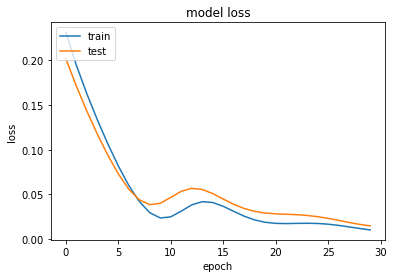

In [302]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [303]:
predictions = scaler_y.inverse_transform(predictions)
predictions

array([[363.02075],
       [294.7436 ],
       [331.36957],
       [422.04993],
       [309.72363],
       [332.5304 ],
       [375.19193],
       [417.3698 ],
       [326.48276],
       [284.89404],
       [410.9854 ],
       [397.6487 ],
       [273.89096],
       [345.24637],
       [322.28625],
       [406.0541 ],
       [349.91226],
       [293.03806],
       [368.77765],
       [273.57373],
       [305.47507],
       [261.3849 ],
       [270.56375],
       [316.32657],
       [307.79987],
       [305.08618],
       [325.94968],
       [351.64044],
       [253.75885],
       [259.982  ],
       [341.7742 ],
       [368.93796],
       [314.97726],
       [363.3355 ],
       [303.9288 ],
       [357.9625 ],
       [296.9478 ],
       [350.0912 ]], dtype=float32)